In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
pa_pos = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_pos.csv")
pa_ip = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_ip.csv")
pa_cc = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_cc.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
pa_pos = pa_pos.set_index("SK_ID_CURR")
pa_ip = pa_ip.set_index("SK_ID_CURR")
pa_cc = pa_cc.set_index("SK_ID_CURR")

In [8]:
pa_pos.head()

,PA_CNT_CREDITS,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_POS_CNT_PAYMENTS_LEFT,PA_POS_CNT_DPD,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest,PA_TARGET,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,
158271,1,6404.310,58905.000,65124.0,0.000,58905.000,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
252457,1,4951.350,47056.275,52641.0,4.275,47056.275,0.000088,9.0,0,1,0,0,0,2,1,1,0,0,1,0,0,0,0
260094,9,10871.105,224829.930,254975.5,973.930,224829.930,0.034724,70.0,0,0,1,1,1,1,0,1,4,3,0,4,0,0,0
176456,1,14713.605,123486.075,120307.5,12349.575,123486.075,0.101388,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
256657,3,20046.525,371935.500,425841.0,26238.000,371935.500,0.233148,28.0,0,2,7,5,1,0,2,5,0,2,1,0,0,0,0


In [6]:
target = app_train[["SK_ID_CURR", "TARGET"]]
target = target.set_index("SK_ID_CURR")

In [7]:
pa_pos = pd.merge(pa_pos, target, how="left", left_index=True, right_index=True)
pa_ip = pd.merge(pa_ip, target, how="left", left_index=True, right_index=True)
pa_cc = pd.merge(pa_cc, target, how="left", left_index=True, right_index=True)

In [9]:
payback_pos = pa_pos[pa_pos["TARGET"] == 0]
default_pos = pa_pos[pa_pos["TARGET"] == 1]

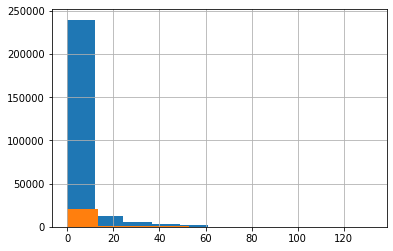

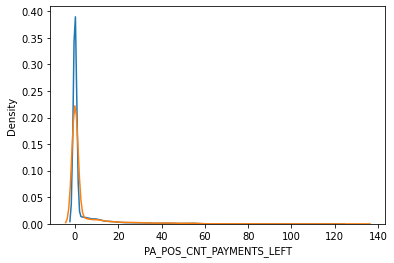

In [13]:
pb = payback_pos["PA_POS_CNT_PAYMENTS_LEFT"]
df = default_pos["PA_POS_CNT_PAYMENTS_LEFT"]

pb.hist()
df.hist()
plt.show()

sns.kdeplot(pb)
sns.kdeplot(df)
plt.show()

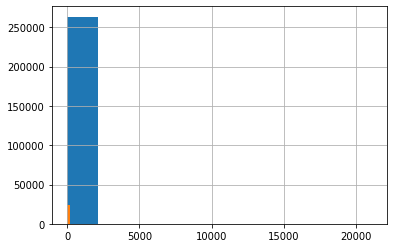

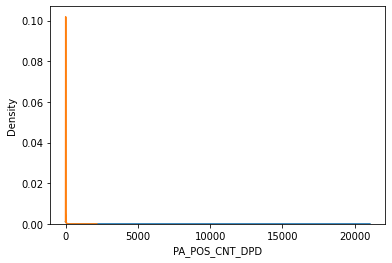

In [14]:
pb = payback_pos["PA_POS_CNT_DPD"]
df = default_pos["PA_POS_CNT_DPD"]

pb.hist()
df.hist()
plt.show()

sns.kdeplot(pb)
sns.kdeplot(df)
plt.show()